## Nivell 1

**Exercici 
1:**
Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".


_Etapes en l'estudi de dades:_
1) Obtenció del data set, neteja, ordenació i extensió amb columnes extres si aporten més informació.

2) Exploració del tipus de dades, quantitat, mitjanes, rangs, valors únics, dimensió,...

3) Exploració gràfica de les possibles relacions entre dades numèriques (bivariades).

4) Exploració gràfica de la informació de les variables categòriques: distribució, relació amb d'altres variables categòriques i/o numèriques,...

5) Extreure resultats/conclusions de les gràfiques.

## <span style=color:darkgreen>EXPLORING BIVARIATE VARIABLES WITH SCATTERPLOTS</span>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
tips=pd.DataFrame(pd.read_csv('tips.csv'))

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


No té valors nuls

In [4]:
tips.shape

(244, 7)

In [5]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
tips.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


Variables Categòriques: sex, smoker, day i time.

In [7]:
tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [8]:
tips.day.nunique()

4

In [9]:
tips.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [10]:
tips.time.nunique()

2

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Una de les maneres ràpides de tenir una visió general gràfica entre variables numèriques és emprar la graficació amb pairplot de Seaborn:

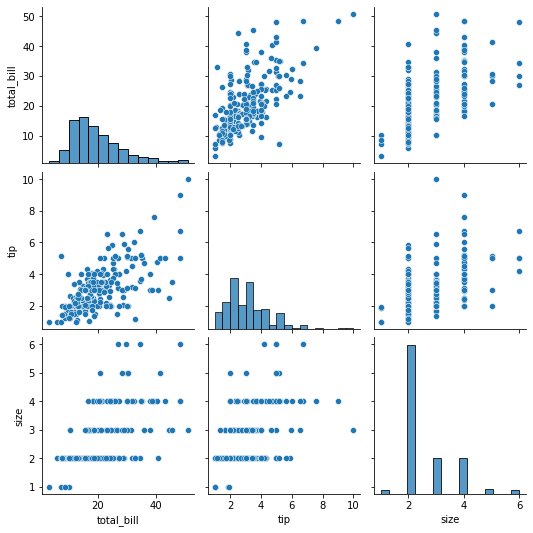

In [12]:
sns.pairplot(tips)

Extraiem la següent informació:

* Tot i tenir valor numèrics, la variable size es comporta com a categòrica perquè només té sis valors.
* Hi ha certa correlació entre la propina i el valor de la factura (i també amb el tamany).
* Obtenim informació de la **distribució** de despeses, propines i dels tamanys. En els tres casos és **una distribució unimodal, asimètrica amb cua per la dreta.**

In [13]:
tips.total_bill.mean() #despessa total promig

19.785942622950824

In [14]:
tips.tip.mean() #propina promig

2.9982786885245902

En aquest punt es pot començar a introduir les variables categòriques per a veure la seva influència

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

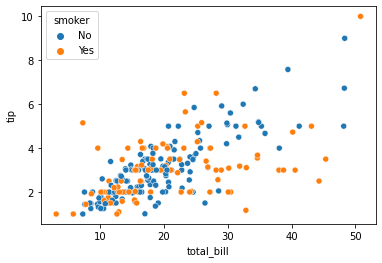

In [15]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='smoker')

A factures més altes els no fumadors tendeixen a deixar més propina que els fumadors.

Veiem la influència del tamany amb dues gràfiques lleugerament diferents:

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

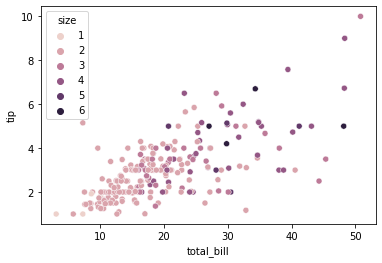

In [16]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='size')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

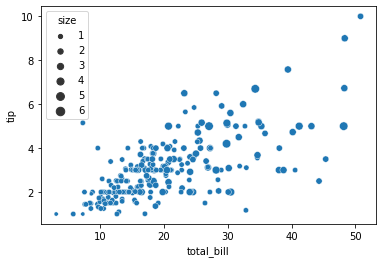

In [17]:
tamany=tips.size.copy()*4

sns.scatterplot(x='total_bill',y='tip',data=tips,size='size')

Les propines són més grans si la despesa és més gran i el tamany aumenta.

Introduint la variable dia:

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

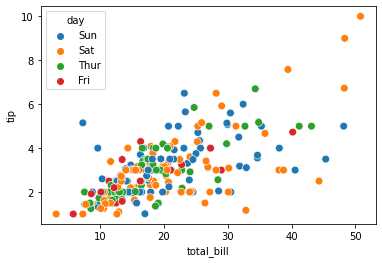

In [18]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='day',s=60)

Dissabte és quan es donen les millors propines.

En lloc de ressaltar diferent els punts, es poden dividir en una graella per a poder comparar-les amb la funció FacetGrid de Seaborn

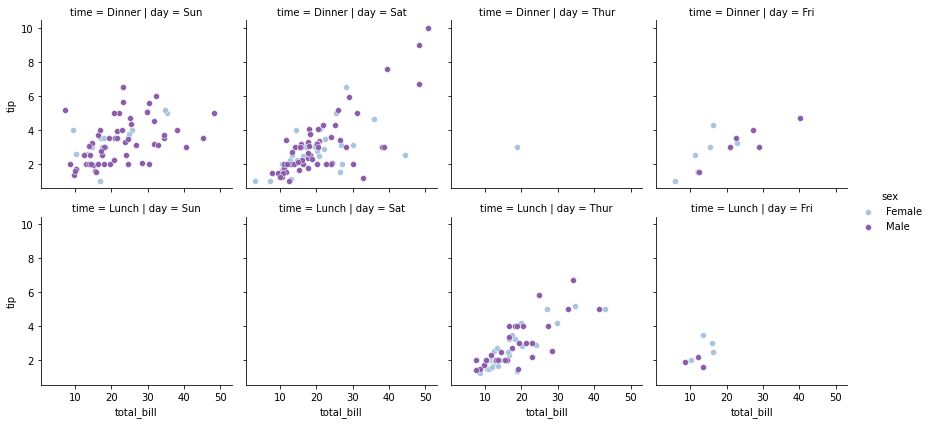

In [19]:
g=sns.FacetGrid(data=tips,col='day', row='time',hue='sex',legend_out=True,palette='BuPu')
g.map(sns.scatterplot,'total_bill','tip')
g.add_legend()

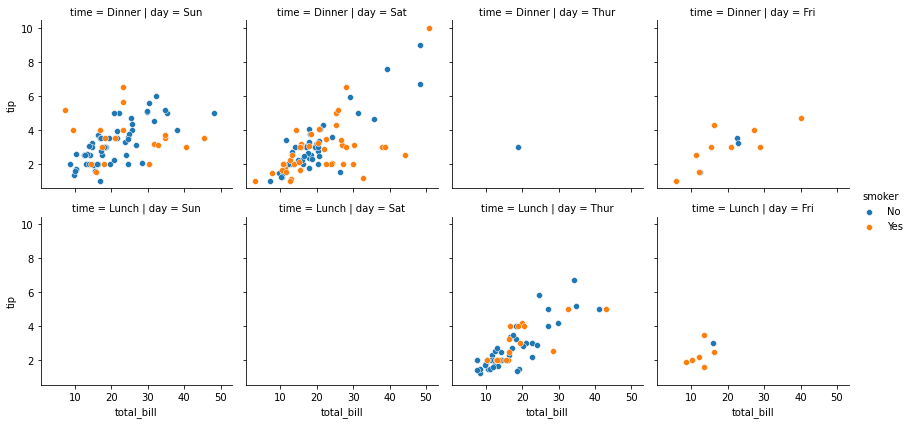

In [20]:
g=sns.FacetGrid(data=tips,col='day', row='time',hue='smoker',legend_out=True)
g.map(sns.scatterplot,'total_bill','tip')
g.add_legend()

Dissabtes i diumenges no obren per dinar (molt estrany).

Quan es treballa amb un gran nombre de dades és més convenient treballar amb grafics que les agrupin per a donar-ne la visió de la seva distribució. Hi ha gran varietat de mètodes per graficar la distribució de les dades: histogrames, kde/densitat, boxplots, violins, ....

1 variable categórica (es poden contar les vegades que apareix):

<AxesSubplot:xlabel='sex', ylabel='count'>

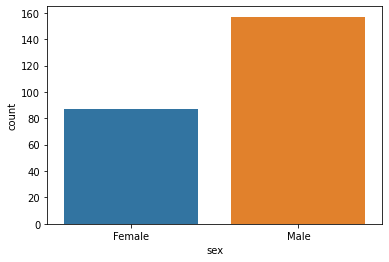

In [21]:
sns.countplot(x='sex', data=tips)

<AxesSubplot:xlabel='smoker', ylabel='count'>

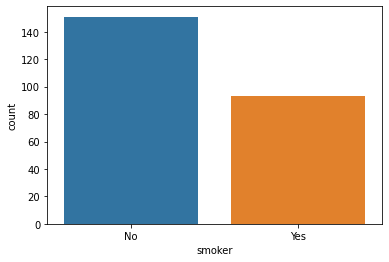

In [22]:
sns.countplot(x='smoker', data=tips)

<AxesSubplot:xlabel='time', ylabel='count'>

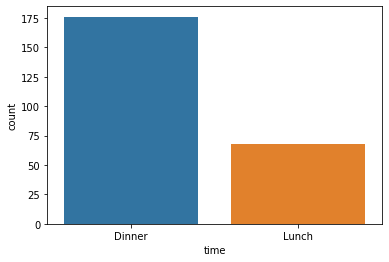

In [23]:
sns.countplot(x='time', data=tips)

<AxesSubplot:xlabel='day', ylabel='count'>

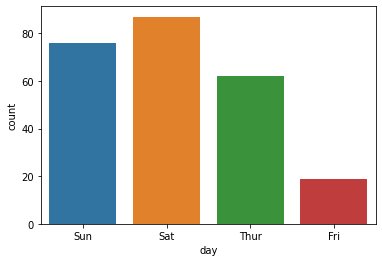

In [24]:
sns.countplot(x='day', data=tips)

1 variable categòrica i 1 variable numèrica

<AxesSubplot:xlabel='day', ylabel='tip'>

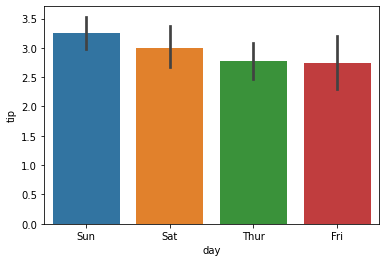

In [25]:
sns.barplot(x='day', y='tip', data=tips) #dona valors promig amb desviació

1 variables numèriques i dues de categòriques #podem introduir una divisió amb hue a la gràfica:

<AxesSubplot:xlabel='day', ylabel='tip'>

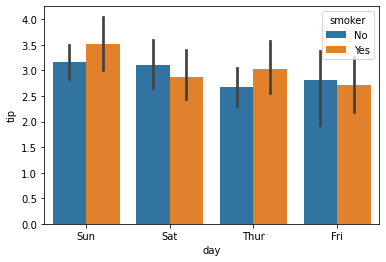

In [26]:
sns.barplot(x='day', y='tip', data=tips, hue='smoker')

<AxesSubplot:xlabel='day', ylabel='tip'>

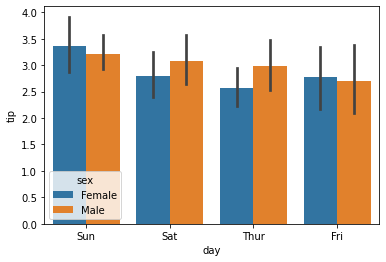

In [27]:
sns.barplot(x='day', y='tip', data=tips, hue='sex')

4 variables: 1 numèrica= propines(tips) / 4 categoriques: dia(dijous, divendres, dissabte,diumenge), temps(diner/lunch), fumador i sexe

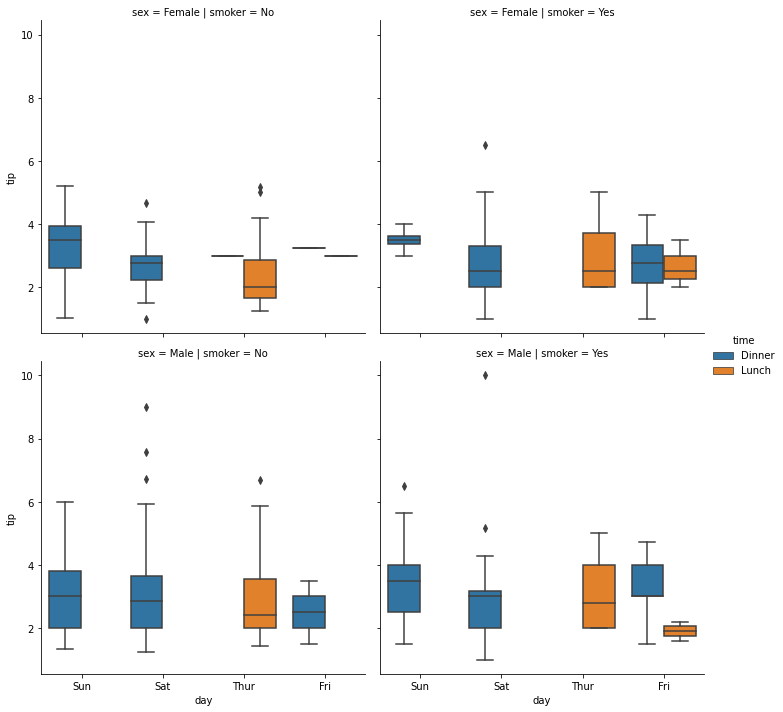

In [28]:
sns.catplot(x='day', y='tip', hue='time', col='smoker', row='sex',kind='box', data=tips)

El perfil de la persona que dóna menys propina seria un home fumador que va a dinar els divendres. (Tot i que es requeriria de més dades per a tenir més fiabilitat amb aquesta conclusió).

## Nivell 2

**Exercici 
2:**
Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

Per poder obrir el fitxer amb read_csv, he hagut d'obrir l'arxiu com a text i salvar-lo amb un altre nom amb la codificació utf-8. Ho he provat de fer amb python però no me n'he sortit. Algun tutorial per dominar-ho?

In [29]:
movies=pd.read_csv('movies_2.dat',sep='::',header=None)

C:\Users\march\anaconda3\envs\notebook\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [30]:
movies=pd.DataFrame(movies)
movies.columns=['borrar','Title','Genres']
movies.drop(['borrar'], axis=1,inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   3883 non-null   object
 1   Genres  3883 non-null   object
dtypes: object(2)
memory usage: 60.8+ KB


In [31]:
movies.head()

,Title,Genres
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy


In [32]:
movies['Year']=movies['Title'].map(lambda x: x.split(sep='(')[-1][0:4]) #generem columna any com int i arreglem title
movies['Title']=movies['Title'].map(lambda x: x.split(sep='(')[0])
movies['Year']=movies['Year'].map(lambda x: int(x)) 


In [33]:
genres=[] #Generem la llista de generes ordenats per ordre alfabetic
for i in range (0, movies.shape[0] ):
    list_m=movies['Genres'][i].split(sep='|')
    for j in list_m:
        if j not in genres:
            genres.append(j)
genres.sort()
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [34]:
for i in genres: #generem una columna per cada genere on diu true o False
    movies[i] = [True if  i in s else False for s in movies['Genres']] 

In [35]:
movies.head()

,Title,Genres,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story,Animation|Children's|Comedy,1995,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Jumanji,Adventure|Children's|Fantasy,1995,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,Grumpier Old Men,Comedy|Romance,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,Waiting to Exhale,Comedy|Drama,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Father of the Bride Part II,Comedy,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


Tenim el DataFrame amb les dades el més exteses possible per a treure'n el màxim de joc. Primer de tot farem resum d'aquest data frame generat:

In [36]:
movies.describe().round(0) #tot i posar els anys com a integers, totes les variables són categòriques.
#el describe  té sentit en aquest cas per saber valor màxim i mínim, la distribució de les pelis en els anys

,Year
count,3883.0
mean,1986.0
std,17.0
min,1919.0
25%,1982.0
50%,1994.0
75%,1997.0
max,2000.0


In [37]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        3883 non-null   object
 1   Genres       3883 non-null   object
 2   Year         3883 non-null   int64 
 3   Action       3883 non-null   bool  
 4   Adventure    3883 non-null   bool  
 5   Animation    3883 non-null   bool  
 6   Children's   3883 non-null   bool  
 7   Comedy       3883 non-null   bool  
 8   Crime        3883 non-null   bool  
 9   Documentary  3883 non-null   bool  
 10  Drama        3883 non-null   bool  
 11  Fantasy      3883 non-null   bool  
 12  Film-Noir    3883 non-null   bool  
 13  Horror       3883 non-null   bool  
 14  Musical      3883 non-null   bool  
 15  Mystery      3883 non-null   bool  
 16  Romance      3883 non-null   bool  
 17  Sci-Fi       3883 non-null   bool  
 18  Thriller     3883 non-null   bool  
 19  War          3883 non-null 

La base de dades consta de 3883 pel·lícules i no hi ha cap valor nul.

In [38]:
movies.Title.nunique()

3833

No es repeteix cap títol de película.

In [39]:
movies.Genres.nunique()

301

Hi ha 301 combinacions diferents segons de quins generes és la pel·lícula. 

## Nivell 3

**Exercici 
3:**
En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.

In [40]:
movies_year=movies.groupby('Year') #generem DataFrame on s'agrupa per anys 

Generem gràfica on es veu l'evolució en el **nombre de películes per any**:

Text(0.5, 1.0, 'Evolution of film production')

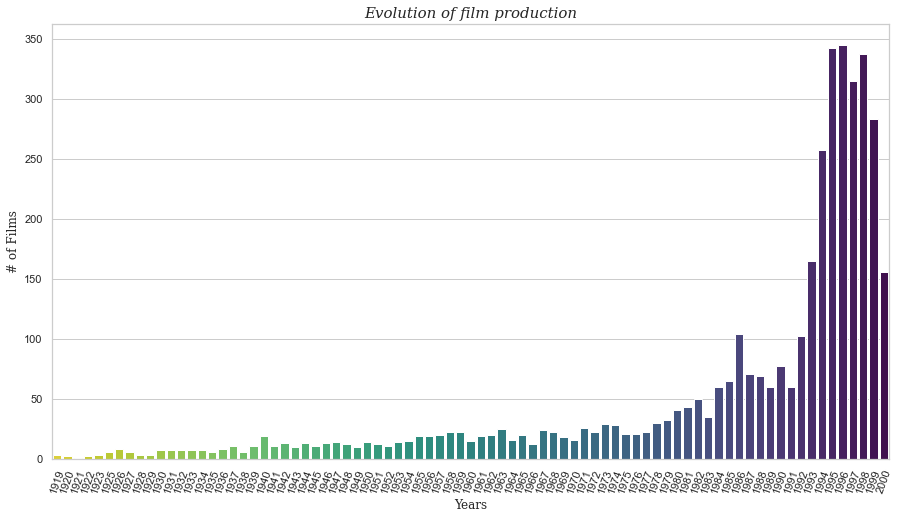

In [41]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style('whitegrid')
film_year=sns.barplot(x=movies_year.count()['Title'].index, y=movies_year.count()['Title'], palette='viridis_r',)
film_year.set_figsize = (15, 3)
film_year.set_xticklabels(film_year.get_xticklabels(),rotation = 70)
film_year.set_xlabel('Years',fontdict=  {'family': 'serif','weight': 'normal', 'size': 12})
film_year.set_ylabel('# of Films',fontdict=  {'family': 'serif','weight': 'normal', 'size': 12})
film_year.set_title('Evolution of film production', fontdict=  {'family': 'serif','weight': 'normal', 'size': 15, 'style':'oblique'})

Estudiem la distribució en generes dels films. Primer en tenim una visió global:

In [42]:
prop_fils=[] #llistat del número de pelicules segons genere
for i in genres:
    prop_fils.append(movies.sum()[i])

In [43]:
genres_ratio=pd.DataFrame()#creem dataFrame per fer la gràfica
genres_ratio['Genres']=genres
genres_ratio['Films']=prop_fils

In [44]:
genres_ratio.sort_values('Films',inplace=True)#ordenem valors de major a menor.

Text(0.5, 1.02, 'Generes of films (1919-2000)')

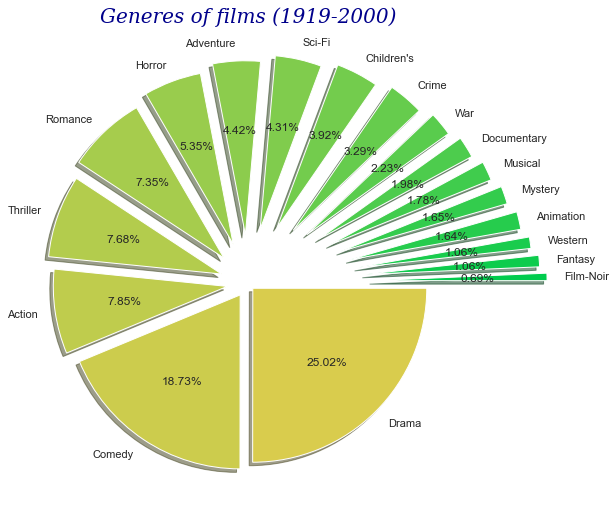

In [45]:
explode_0 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18] #per donar aparença caracola i separar formagets petits
explode_0=reversed(explode_0)
explode =list(map(lambda x: x *0.04, explode_0))

def scaleColors(numberColors): #he jugat amb els colors per fer escala dintre de gràfica
    listColors=[]
    for i in range(0,numberColors):
        listColors.append([0,0,0])
        listColors[i][0]=((1/numberColors)*i)*0.9 #finalment he tret el factor aleatori però deixo el nom de la funció
        listColors[i][1]=0.8
        listColors[i][2]=0.3
    return listColors
colors= scaleColors(18)  


fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.pie(genres_ratio.Films, explode = explode,shadow=True, radius=1.0, autopct = '%1.2f%%',labels =genres_ratio['Genres'],colors=colors)
ax.axis('off')
fontdict_1 = {'family': 'serif','color':  'darkblue','weight': 'normal', 'size': 20, 'style':'oblique'}
fontdict_2 = {'family': 'serif','color':  'black','weight': 'normal', 'size': 12, 'style':'oblique'}#Estil dels títols
#ax.pie(flights,center=(-1,-1),explode = explode,shadow=True, labels = uniqueCarriers,radius=1.0, autopct = '%1.2f%%',colors=colors,textprops =fontdict_2,pctdistance=0.7 )
ax.set_title("Generes of films (1919-2000)", y=1.02, pad=35,fontdict=fontdict_1)

Després fem una barreja de les dues gràfiques anterios, on podem veure l'evolució de la producció de films al llarg dels anys diferenciant entre els diferents gèneres:

Text(0.5, 1.0, 'Evolution of genres along the years')

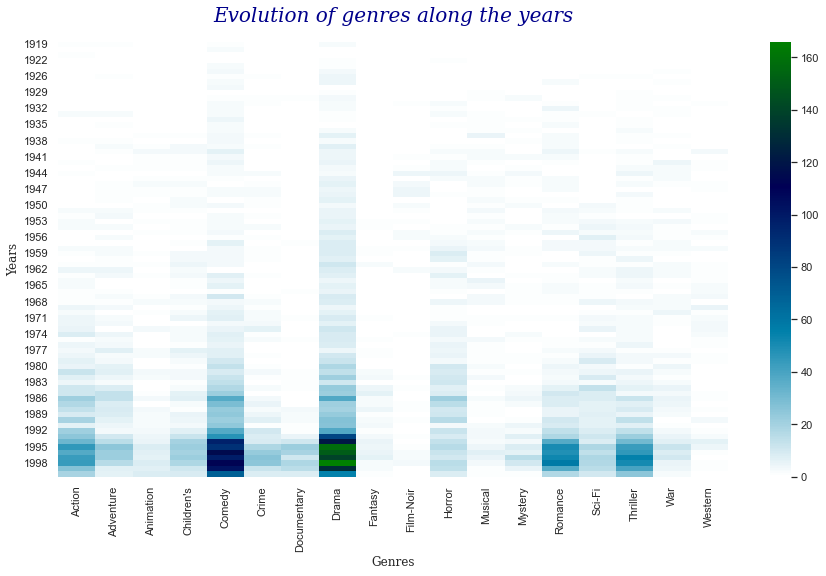

In [46]:
movies_genre_year=pd.DataFrame(movies_year.sum())
genre_year=sns.heatmap(movies_genre_year, cmap='ocean_r')
genre_year.set_xlabel('Genres',fontdict=  {'family': 'serif','weight': 'normal', 'size': 12})
genre_year.set_ylabel('Years',fontdict=  {'family': 'serif','weight': 'normal', 'size': 12})
genre_year.set_title('Evolution of genres along the years',  fontdict=fontdict_1,pad=20)



Els 4 generes més reflectits en les pel·lícules són per ordre descendent: Drama, Comedia i Acció. 

, Romàntiques i Thrillers.Drama i comedia són els dos gèneres que més surten a les películes en tots els temps. 

In [47]:
#generem dataframe amb valors percentuals per any respecte els gèneres per a eliminar l'efecte del número de películes
movies_genre_year_percentage=movies_genre_year.transpose().copy() 
for j in movies_genre_year_percentage.columns:
    sumColumn= movies_genre_year_percentage[j].sum()
    for i in movies_genre_year_percentage.index: 
        movies_genre_year_percentage.loc[i,j]=100*(movies_genre_year_percentage.loc[i,j]/ sumColumn)
movies_genre_year_percentage=movies_genre_year_percentage.transpose()

Text(0.5, 1.0, 'Evolution of ratio of genres along the years')

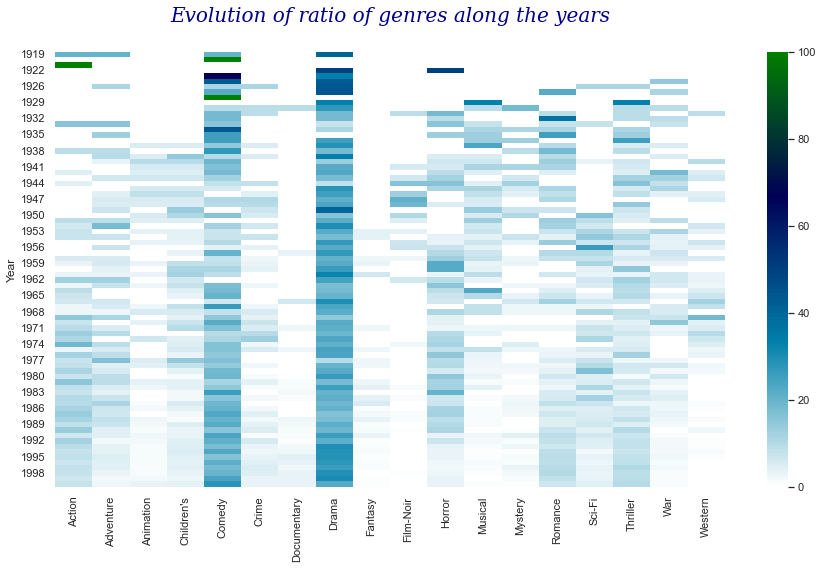

In [48]:
genre_year_percentage=sns.heatmap(movies_genre_year_percentage, cmap='ocean_r')
genre_year_percentage.set_title('Evolution of ratio of genres along the years',  fontdict=fontdict_1,pad=30)

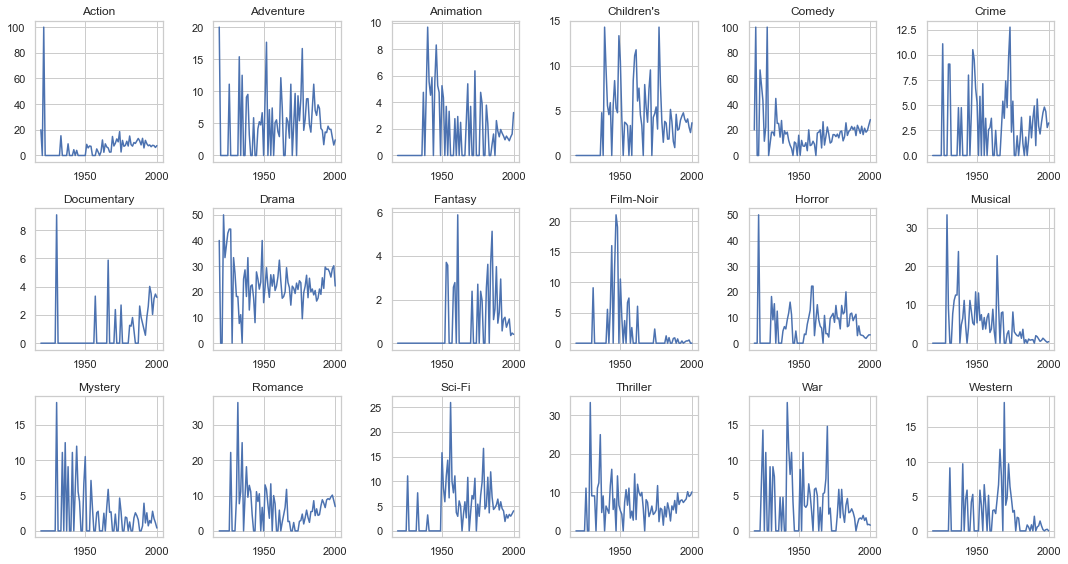

In [49]:
i=1
for genre in movies_genre_year_percentage.columns:
    plt.subplot(3,6,i)
    plt.plot(list(movies_genre_year_percentage.index), list(movies_genre_year_percentage[genre]))
    plt.title(genre)
    i+=1
plt.tight_layout()

De les 2 gràfiques anteriors i amb cert coneixement cinematogràfic i d'història es pot inferir certa informació:
+ L'època dorada del film noir va ser 1940-1950
+ L'època millor pel Western va ser 1965-1970 (western americans i spagueti western)
+ Es van fer més pel·lícules bèliques segurament degut a la 2a guerra mundial i a la guerra del Vietnam. 